In [5]:
import io
import bson                       # this is installed with the pymongo package
import matplotlib.pyplot as plt
from skimage.data import imread   # or, whatever image library you prefer
import multiprocessing as mp      # will come in handy due to the size of the data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import bson
from bson.codec_options import CodecOptions
import os
import numpy as np


In [6]:
os.getcwd()

'/Users/Wang/Desktop/Git/DataScience-Projects/C-Discount_Img_classification/Code'

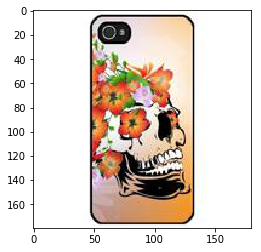

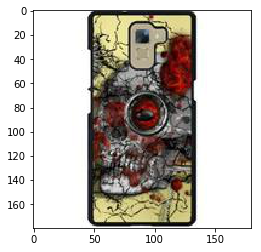

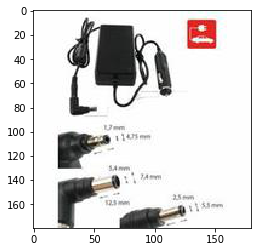

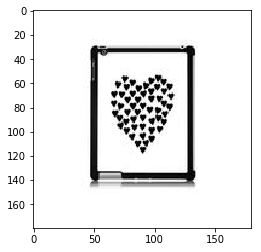

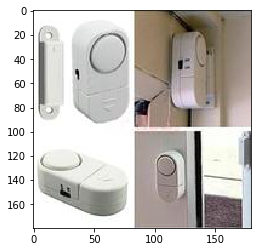

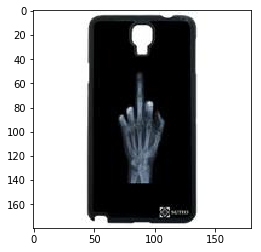

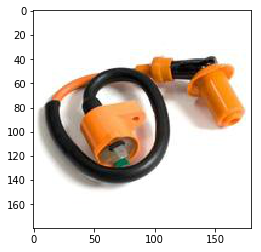

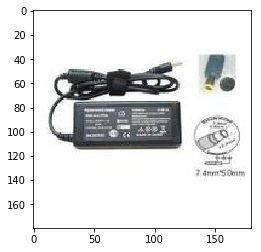

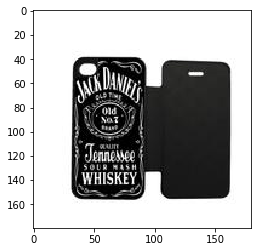

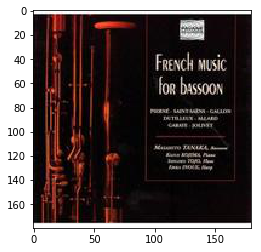

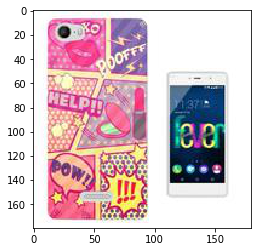

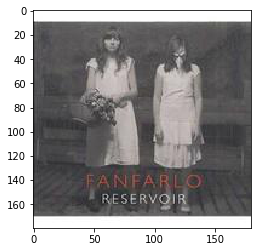

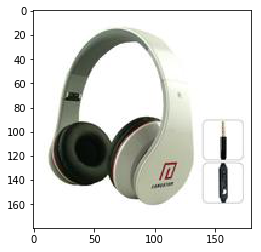

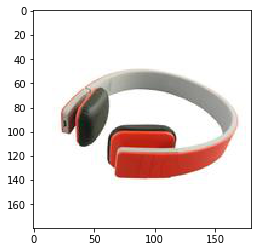

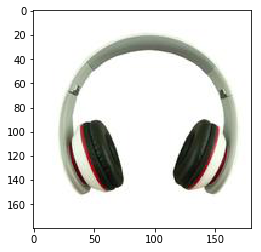

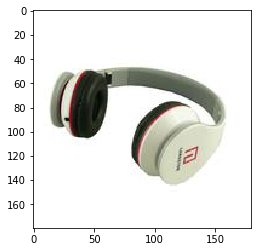

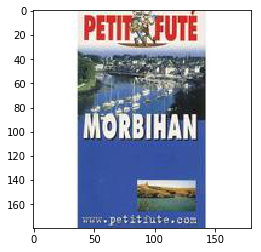

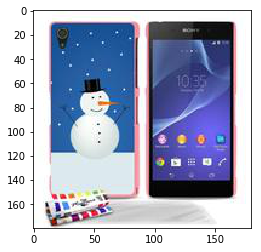

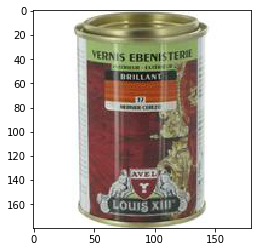

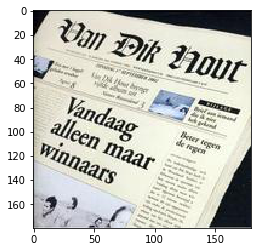

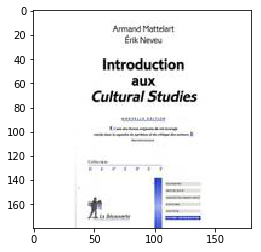

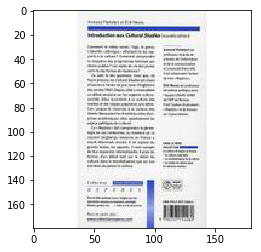

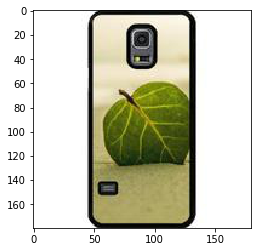

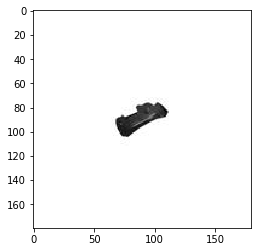

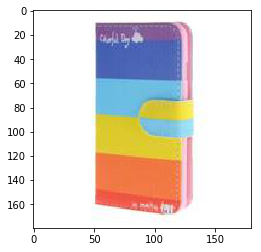

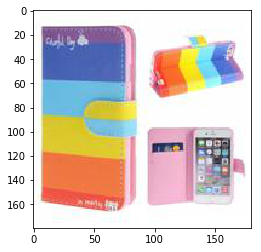

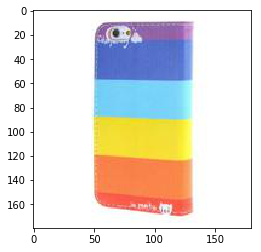

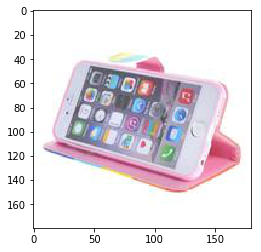

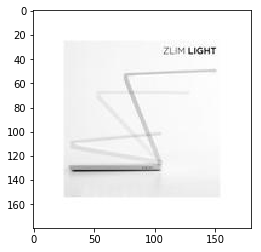

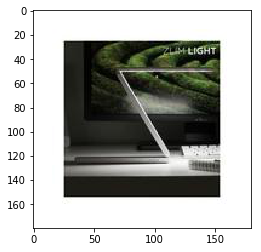

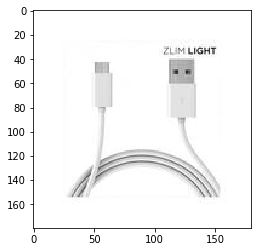

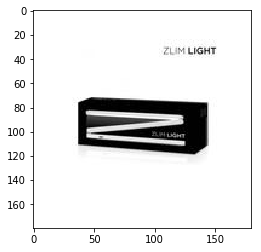

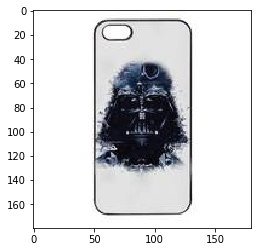

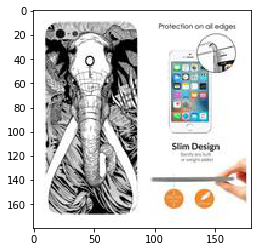

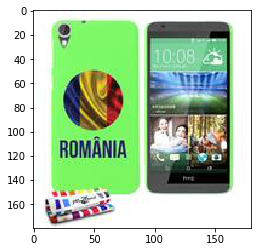

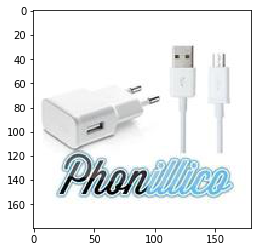

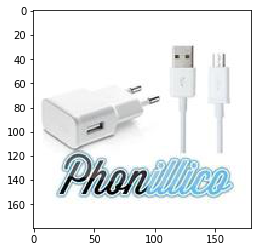

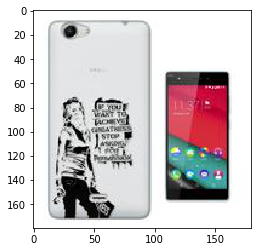

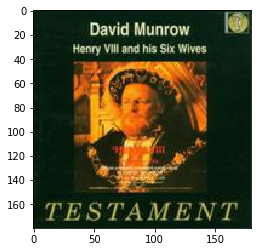

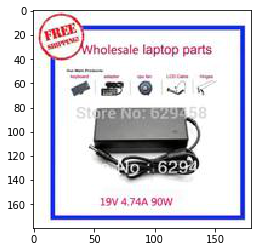

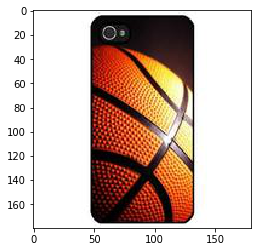

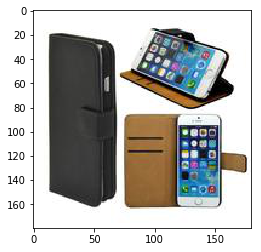

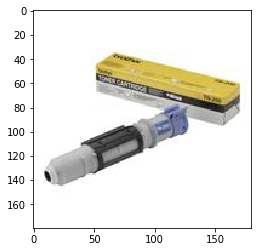

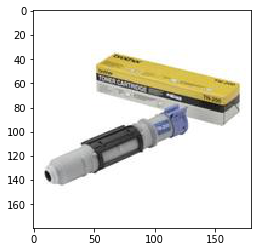

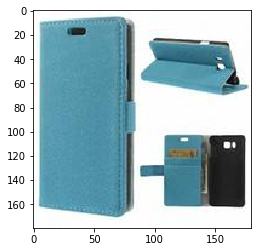

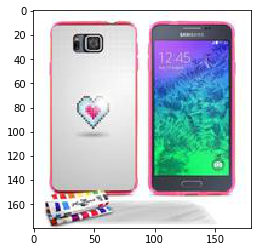

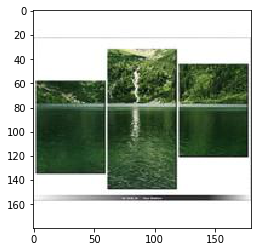

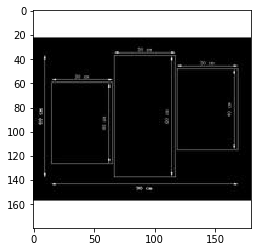

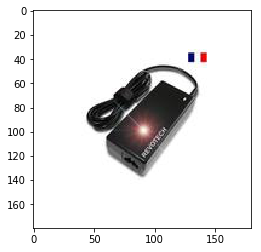

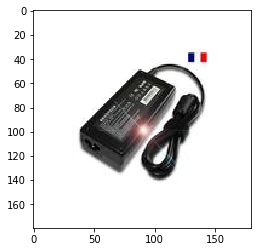

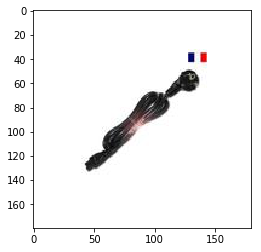

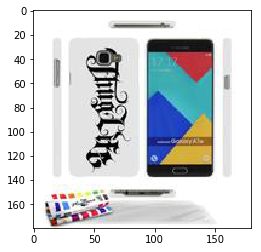

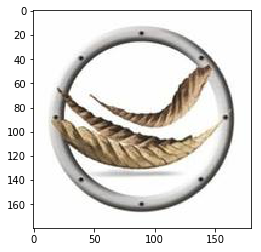

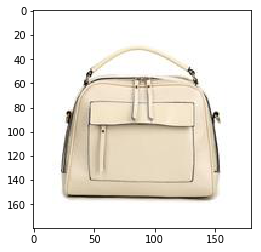

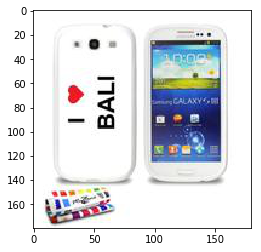

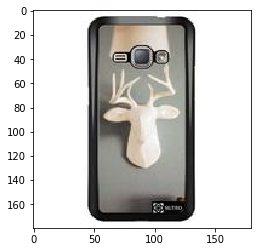

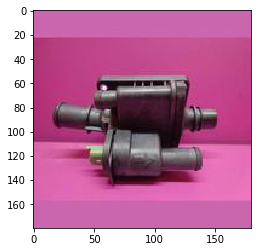

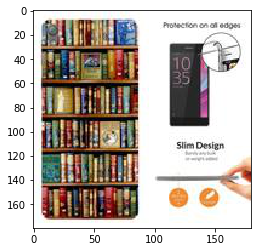

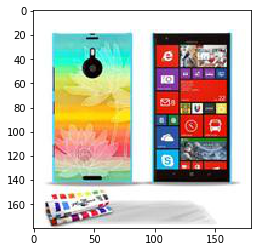

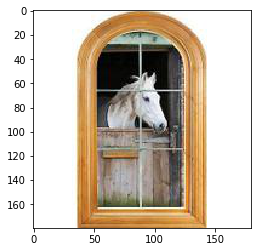

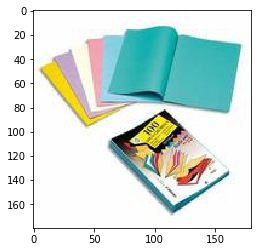

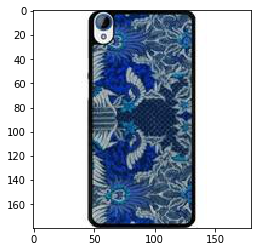

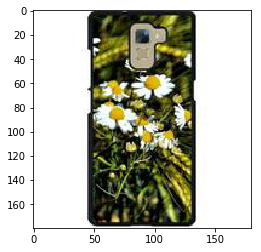

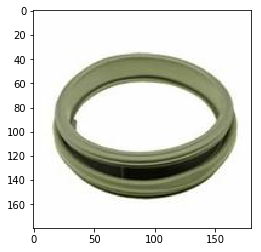

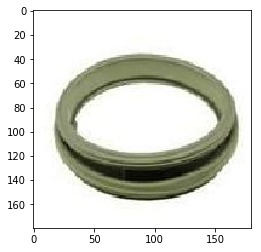

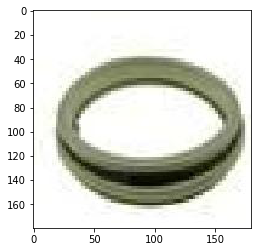

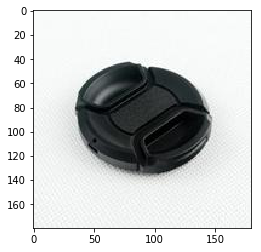

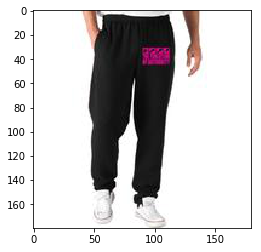

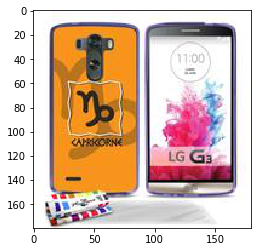

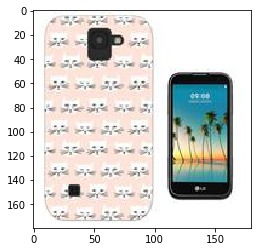

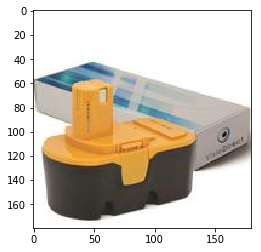

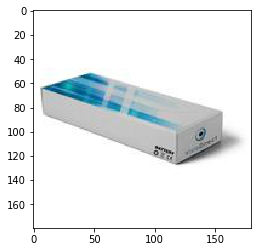

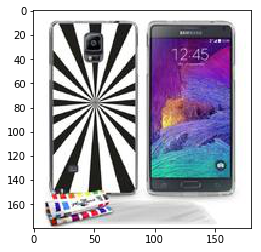

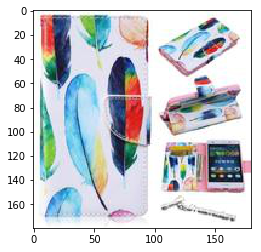

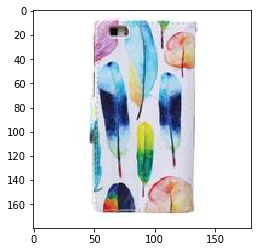

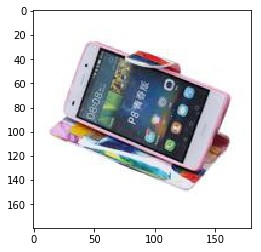

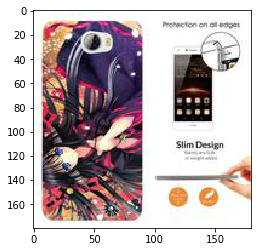

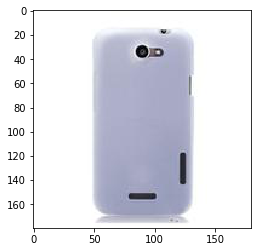

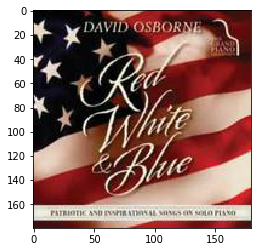

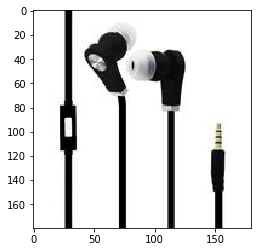

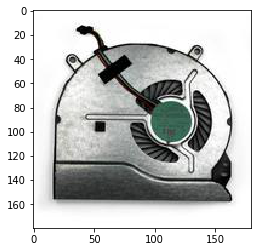

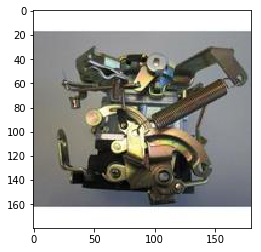

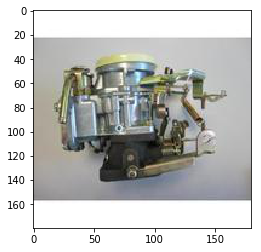

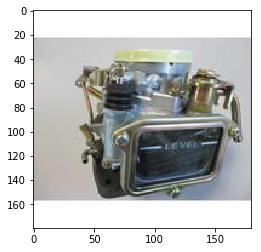

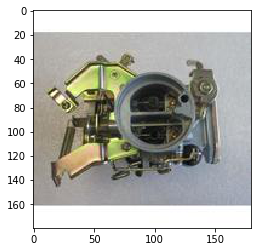

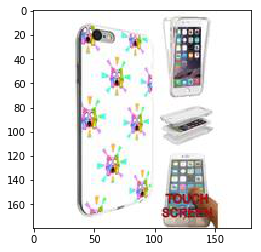

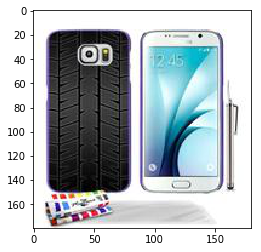

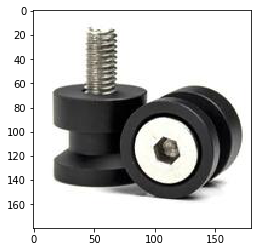

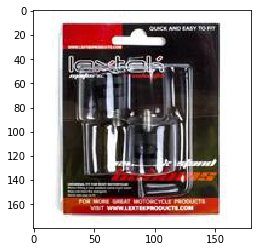

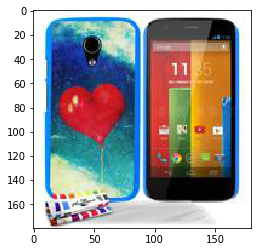

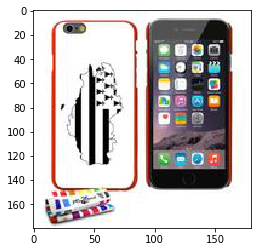

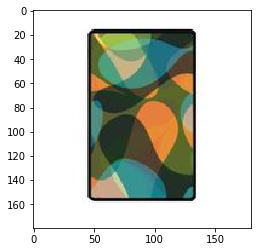

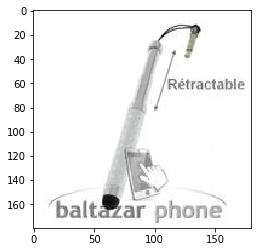

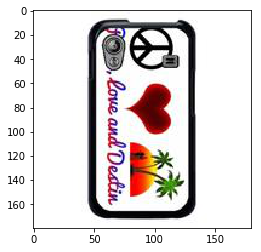

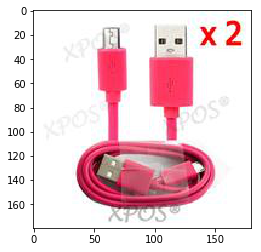

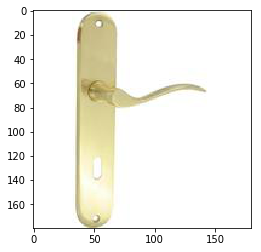

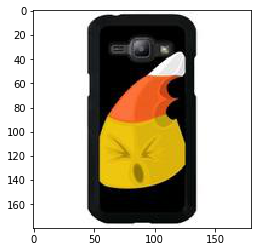

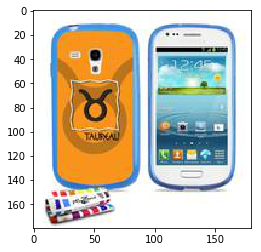

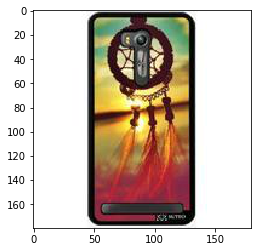

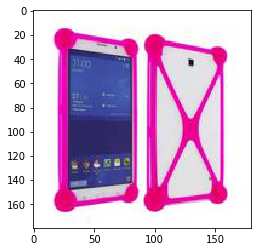

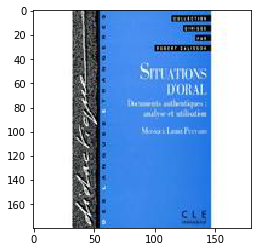

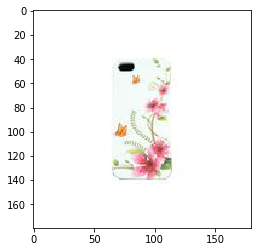

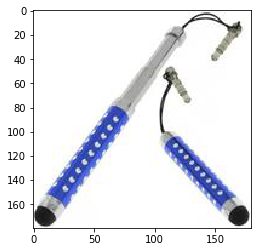

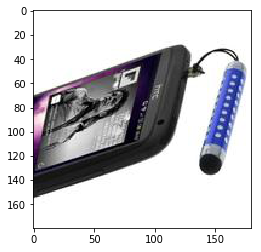

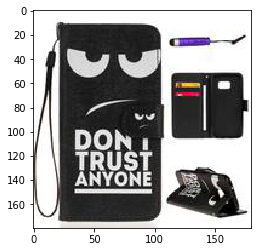

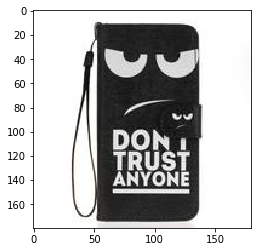

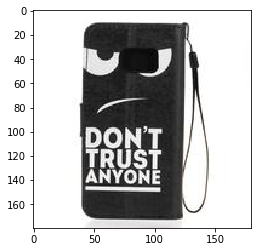

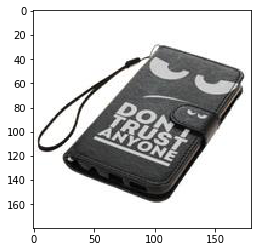

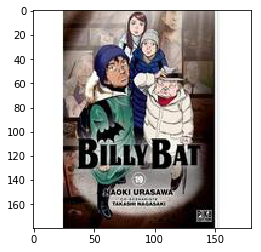

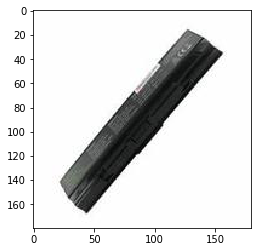

In [39]:
data = bson.decode_file_iter(open("/Users/Wang/Desktop/Git/DataScience-Projects/C-Discount_Img_classification/data/train_example.bson", 'rb'))

prod_to_category = dict()
img = []

for c, d in enumerate(data):
    product_id = d['_id']
    category_id = d['category_id'] # This won't be in Test data
    prod_to_category[product_id] = category_id
    #print(category_id)
    for e, pic in enumerate(d['imgs']):
        picture = imread(io.BytesIO(pic['picture']))
        img.append(picture)
        #plt.imshow(picture)
        #plt.show()
        # do something with the picture, etc

img = np.array(img)
prod_to_category = pd.DataFrame.from_dict(prod_to_category, orient='index')
prod_to_category.index.name = '_id'
prod_to_category.rename(columns={0: 'category_id'}, inplace=True)

In [43]:
flatten = img.reshape(img.shape[0], -1).T

In [45]:
csv = pd.DataFrame()

(97200, 110)